In [1]:
import pandas as pd
import numpy as np
import scipy.io
import math
from collections import Counter
import copy
import warnings
import tensorflow as tf
from tensorflow.keras.layers import *
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import BatchNormalization
warnings.filterwarnings("ignore")

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0] + 1)
def pretty(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):

            pretty(value, indent + 2)
            print('-----------------------')
        else:
            print('\t' * (indent + 2) + str(value))
            print(" ")
def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]
def extractSubject(name):
    ex1Path = 'DB1/' + name + '/' + name + '_A1_E1.mat'
    print(ex1Path)
    ex1 = scipy.io.loadmat(ex1Path)
    emg = ex1['emg']
    EMGdf = pd.DataFrame.from_dict(emg)
    stimulus = ex1['stimulus']

    ex2Path = 'DB1/' + name + '/' + name + '_A1_E2.mat'
    ex2 = scipy.io.loadmat(ex2Path)
    emg2 = ex2['emg']
    EMGdf2 = pd.DataFrame.from_dict(emg2)
    stimulus2 = ex2['stimulus']

    ex3Path = 'DB1/' + name + '/' + name + '_A1_E3.mat'
    ex3 = scipy.io.loadmat(ex3Path)
    emg3 = ex3['emg']
    EMGdf3 = pd.DataFrame.from_dict(emg3)
    stimulus3 = ex3['stimulus']

    Movements = {}
    for m in range(1, 53):
        if (m < 13):
            movementIndices = np.where(stimulus == m)[0]
            repetitions = consecutive(movementIndices)
            EMG = EMGdf
        elif (m < 30):
            movementIndices = np.where(stimulus2 == (m - 12))[0]
            repetitions = consecutive(movementIndices)
            EMG = EMGdf2
        else:
            movementIndices = np.where(stimulus3 == (m - 29))[0]
            repetitions = consecutive(movementIndices)
            EMG = EMGdf3

        Repetitions = {}
        for r in range(1, 7):
            startIndex = repetitions[r - 1][0]
            LastIndex = repetitions[r - 1][len(repetitions[r - 1]) - 1]
            df = EMG.iloc[startIndex:LastIndex, 0:10]
            df.reset_index(drop=True, inplace=True)
            Repetitions["R{0}".format(r)] = df
        Movements["Movement{0}".format(m)] = Repetitions
    return Movements
def Average(lst):
    return sum(lst) / len(lst)


In [127]:

columns = {'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'Train','Movement'}
X_train_2 = []
y_train_2 = []
X_test_2 = []
y_test_2 = []
for s in range(1,28):
    subject = 'S' + str(s)
    dff = pd.DataFrame.from_dict(extractSubject(subject))
    for m in range(13,30):
        M = dff['Movement'+str(m)]
        for r in range(1,7): 
            r_index = "R" + str(r)
            rep = M[r_index]
            if (r in [1, 3, 4, 6]):
                train = True
            else:
                train = False
            i=0    
            for x in range(0, len(rep), 1):
                entry = rep.iloc[x:x+20, :]
                entry.columns = {'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10'}
                entry.reset_index(drop=True, inplace=True)
                matrix = entry.to_numpy()
                if matrix.shape[0]==20:
                    if(train):
                        X_train_2.append(matrix)
                        y_train_2.append(m)
                    else :
                        X_test_2.append(matrix)
                        y_test_2.append(m)  
                    print(i)    
                    i+=1
                       


DB1/S1/S1_A1_E1.mat
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
27

KeyboardInterrupt: 

In [125]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
print("X Train shape: ", X_train.shape)
print("X Test shape: ", X_test.shape)
print("Y Train shape: ", y_train.shape)
print('------------------')
X_train = np.array(X_train).reshape(X_train.shape[0],20,10)
X_test = np.array(X_test).reshape(X_test.shape[0],20,10)
y_train = np.array(y_train).astype('float32').reshape(X_train.shape[0],1)
y_test = np.array(y_test).astype('float32').reshape(X_test.shape[0],1)

y_train= tf.one_hot(y_train,52)
y_test= tf.one_hot(y_test,52)
y_test = np.array(y_test).astype('float32').reshape(X_test.shape[0],52)
y_train = np.array(y_train).astype('float32').reshape(X_train.shape[0],52)

print("X Train shape: ", X_train.shape)
print("X Test shape: ", X_test.shape)
print("Y Train shape: ", y_train.shape)

X Train shape:  (912985, 20, 10)
X Test shape:  (456351, 20, 10)
Y Train shape:  (912985,)
------------------
X Train shape:  (912985, 20, 10)
X Test shape:  (456351, 20, 10)
Y Train shape:  (912985, 52)


In [126]:
input = Input(shape =(20,10,1))
x = Conv2D(32,(1,10), kernel_initializer='glorot_normal', activation='relu', padding='same', input_shape = (20,10))(input)
x = Dropout(0.15)(x)

x = Conv2D(32,(3,3),kernel_initializer='glorot_normal', activation='relu' ,padding='same')(x)
x = Dropout(0.15)(x)
x = MaxPooling2D((3,3))(x)

x = Conv2D(64,(5,5), kernel_initializer='glorot_normal', activation='relu', padding='same')(x)
x = Dropout(0.15)(x)
x = MaxPooling2D((3,3))(x)

x = Conv2D(64,(5,1), kernel_initializer='glorot_normal', activation='relu', padding='same')(x)
x = Dropout(0.15)(x)
x = Flatten()(x)
ouput = Dense(52, kernel_initializer='glorot_normal', activation='softmax')(x)


model = Model(input, ouput)
model.compile(optimizer=SGD(learning_rate=0.05), loss="categorical_crossentropy", metrics=['accuracy'])
print(X_train.shape)

history = model.fit(X_train, y_train, epochs=35, validation_data= (X_test, y_test))
print(model.evaluate(X_test, y_test))


(912985, 20, 10)
Epoch 1/35
28531/28531 [==============================] - 221s 8ms/step - loss: 2.1199 - accuracy: 0.3097 - val_loss: 1.9164 - val_accuracy: 0.3883
Epoch 2/35
28531/28531 [==============================] - 221s 8ms/step - loss: 1.7510 - accuracy: 0.4278 - val_loss: 1.8274 - val_accuracy: 0.4157
Epoch 3/35
28531/28531 [==============================] - 210s 7ms/step - loss: 1.6584 - accuracy: 0.4573 - val_loss: 1.7587 - val_accuracy: 0.4401
Epoch 4/35
28531/28531 [==============================] - 211s 7ms/step - loss: 1.6084 - accuracy: 0.4742 - val_loss: 1.7606 - val_accuracy: 0.4453
Epoch 5/35
28531/28531 [==============================] - 212s 7ms/step - loss: 1.5791 - accuracy: 0.4841 - val_loss: 1.7786 - val_accuracy: 0.4354
Epoch 6/35
28531/28531 [==============================] - 364s 13ms/step - loss: 1.5573 - accuracy: 0.4905 - val_loss: 1.7403 - val_accuracy: 0.4490
Epoch 7/35
28531/28531 [==============================] - 223s 8ms/step - loss: 1.5409 - accur

In [129]:
# model.summary()
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
class_labels = np.argmax(y_pred, axis=1) 
y_df = pd.DataFrame(class_labels)
y_df.to_csv('y_pred.csv')
class_labels_2 = np.argmax(y_test, axis=1) 
y_df_2 = pd.DataFrame(class_labels_2)
y_df_2.to_csv('y_test.csv')
print(class_labels)
print(class_labels_2)
y_test_new = [most_frequent(class_labels_2[x:x + 495]) for x in range(0, len(class_labels_2), 495)]
y_predicted_new = [most_frequent(class_labels[x:x + 495]) for x in range(0, len(class_labels), 495)]
accuracy_modified = accuracy_score(y_test_new, y_predicted_new)
print(accuracy_modified)


[18 18 18 ... 24 23 23]
[13 13 13 ... 29 29 29]
0.8720173535791758


In [130]:
# class_labels
y_test_new
# # y_train.shape
# # y_test.shape

count = [0] *52
mistake = [0] *52

for i in range(len(y_test_new)):
    count[y_test_new[i]-1] +=1
    if y_test_new[i] != y_predicted_new[i]:
        mistake[y_test_new[i]-1]+=1
mistake = np.array(mistake)
m_sum = np.sum(mistake)
print(m_sum)
print(len(y_test_new))
print(mistake)
ratio = np.divide(mistake,len(y_test_new))
print(ratio)
print("Movement Accuracy", accuracy_modified)

118
922
[ 0  0  0  0  0  0  0  0  0  0  0  0  5  5  4 23  7  7  5  4  6  6 13  8
  6  3  6  6  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00542299 0.00542299 0.00433839 0.02494577 0.00759219 0.00759219
 0.00542299 0.00433839 0.00650759 0.00650759 0.01409978 0.00867679
 0.00650759 0.0032538  0.00650759 0.00650759 0.00433839 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Movement Accuracy 0.8720173535791758


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[ 5  5  4 23  7  7  5  4  6  6 13  8  6  3  6  6  4]


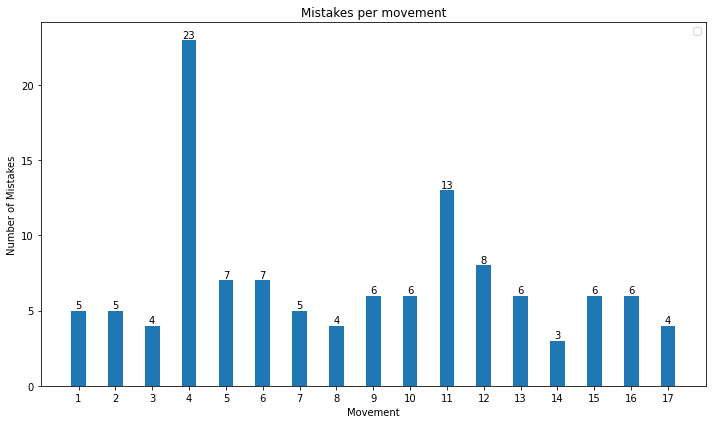

In [133]:
mistake2 = mistake[12:29]
print(mistake2)
fig, ax = plt.subplots(figsize = (10,6))
x = list(range(1, 18))
movement = ax.bar(x, mistake2, 0.4)
ax.set_ylabel('Number of Mistakes')
ax.set_xlabel('Movement')
ax.set_title('Mistakes per movement')
ax.set_xticks(x)
ax.legend()
ax.bar_label(movement)
fig.tight_layout()
plt.show()

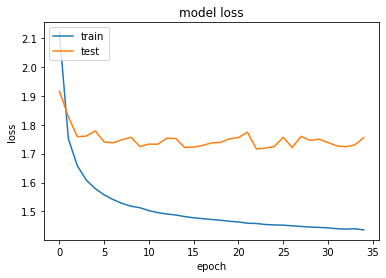

In [132]:
# model.history['accuracy']
# model.history['loss']
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

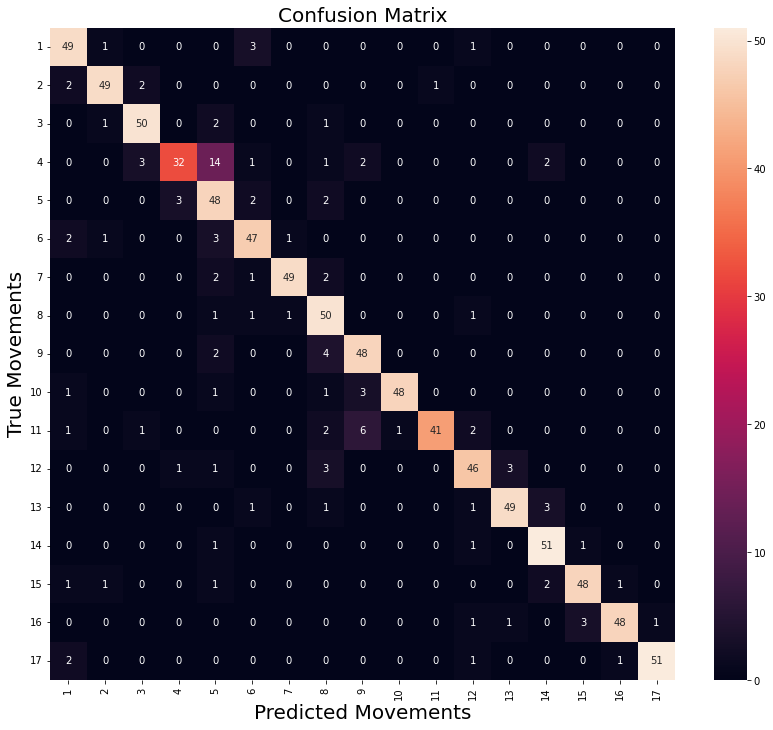

              precision    recall  f1-score   support

          13      0.845     0.907     0.875        54
          14      0.925     0.907     0.916        54
          15      0.893     0.926     0.909        54
          16      0.889     0.582     0.703        55
          17      0.632     0.873     0.733        55
          18      0.839     0.870     0.855        54
          19      0.961     0.907     0.933        54
          20      0.746     0.926     0.826        54
          21      0.814     0.889     0.850        54
          22      0.980     0.889     0.932        54
          23      0.976     0.759     0.854        54
          24      0.852     0.852     0.852        54
          25      0.925     0.891     0.907        55
          26      0.879     0.944     0.911        54
          27      0.923     0.889     0.906        54
          28      0.960     0.889     0.923        54
          29      0.981     0.927     0.953        55

    accuracy              

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

### Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_new, y_predicted_new)

## Get Class Labels
# labels = le.classes_
class_names = range(1,18)

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(14, 12))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted Movements', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Movements', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()
print(metrics.classification_report(y_test_new, y_predicted_new, digits=3))